In [48]:
################ ---------------ETL ------------------

# Dependencies and Setup

%matplotlib inline
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import scipy.stats as stats
from sqlalchemy import create_engine
import time
from datetime import datetime

############# --------------- EXTRACT ------------------

In [49]:
####------------------The sources of data that you will extract from
#### SOURCE 1 PERU HEALTH Indicators  ---https://query.data.world/s/7jepvse4mb3wpzqsauabcfs736f2h2
#Includes information regarding healths and casue of deaths as Number of reported deaths from cholera, Infant mortality rate (probability of dying between birth and age 1 per 1000 live births), 
#Under-five mortality rate (probability of dying by age 5 per 1000 live births), Maternal mortality ratio (per 100 000 live births)
#Life expectancy at birth (years), and causes of death among children aged less than 5 years between others items.

#### SOURCE 2 PERU ECONOMICS Indicators  ---https://query.data.world/s/bnrgb7cm7dpptarwdoqqceiacfur3h
#Inclusdes information regarding popultations and economics as popultation total, International migrant stock, Population growth (annual %)
#Population density (people per sq. km of land area), Mortality rate, adult, female (per 1,000 female adults), Mortality rate, adult, male (per 1,000 male adults), 
#Inflation, consumer prices (annual %), Urban population (% of total), GNI per capita, PPP (current international $)

In [50]:
####################### PERU HEALTH INDICATORS ############# 
#Extracting and cleaning process ( selecting only needed columns)
peru_health_df = pd.read_csv('https://query.data.world/s/7jepvse4mb3wpzqsauabcfs736f2h2')
peru_health_df.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),DATASOURCE (CODE),DATASOURCE (DISPLAY),DATASOURCE (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),...,DHSMICSGEOREGION (CODE),DHSMICSGEOREGION (DISPLAY),DHSMICSGEOREGION (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
0,#indicator+code,#indicator+name,#indicator+url,NaN,#meta+source,NaN,#status+code,#status+name,NaN,NaN,...,NaN,NaN,NaN,NaN,#indicator+value+num,NaN,NaN,NaN,NaN,NaN
1,anc1,Antenatal care coverage - at least one visit (...,http://apps.who.int/gho/data/node.wrapper.imr?...,EQ_DHS,DHS,http://dhsprogram.com/,PUBLISHED,Published,NaN,1996,...,NaN,NaN,NaN,87.0 [85.7-88.1],86.95468,85.67469,88.13614,NaN,NaN,NaN
2,anc1,Antenatal care coverage - at least one visit (...,http://apps.who.int/gho/data/node.wrapper.imr?...,EQ_DHS,DHS,http://dhsprogram.com/,PUBLISHED,Published,NaN,1996,...,PERDHS199603,03 apurimac,NaN,75.1 [67.2-81.6],75.06849,67.21438,81.55734,NaN,NaN,NaN
3,anc1,Antenatal care coverage - at least one visit (...,http://apps.who.int/gho/data/node.wrapper.imr?...,EQ_DHS,DHS,http://dhsprogram.com/,PUBLISHED,Published,NaN,1996,...,PERDHS199604,04 arequipa,NaN,89.5 [85.9-92.2],89.47369,85.93588,92.20231,NaN,NaN,NaN
4,anc1,Antenatal care coverage - at least one visit (...,http://apps.who.int/gho/data/node.wrapper.imr?...,EQ_DHS,DHS,http://dhsprogram.com/,PUBLISHED,Published,NaN,1996,...,PERDHS199605,05 ayacucho,NaN,56.1 [47.0-64.8],56.11940,47.04358,64.80352,NaN,NaN,NaN


In [51]:
peru_health_df.count()

GHO (CODE)                        3831
GHO (DISPLAY)                     3831
GHO (URL)                         3831
DATASOURCE (CODE)                 2497
DATASOURCE (DISPLAY)              2498
DATASOURCE (URL)                  2257
PUBLISHSTATE (CODE)               3831
PUBLISHSTATE (DISPLAY)            3831
PUBLISHSTATE (URL)                   0
YEAR (CODE)                       3830
YEAR (DISPLAY)                    3831
YEAR (URL)                           0
REGION (CODE)                     3819
REGION (DISPLAY)                  3819
REGION (URL)                         0
WORLDBANKINCOMEGROUP (CODE)        864
WORLDBANKINCOMEGROUP (DISPLAY)     864
WORLDBANKINCOMEGROUP (URL)           0
COUNTRY (CODE)                    3831
COUNTRY (DISPLAY)                 3831
COUNTRY (URL)                        0
EDUCATIONLEVEL (CODE)              180
EDUCATIONLEVEL (DISPLAY)           180
EDUCATIONLEVEL (URL)                 0
SEX (CODE)                         363
SEX (DISPLAY)            

######################## -------TRANSFORM ----------------------------------

In [52]:
#### Columns selectings:GHO (CODE),GHO (DISPLAY),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),YEAR (CODE),
#####YEAR (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY), Numeric 
### and rename them with friendly name
    
new_peru_health_df = peru_health_df[['GHO (CODE)','GHO (DISPLAY)',
                                    'YEAR (DISPLAY)','COUNTRY (CODE)','SEX (DISPLAY)',
                                    'Numeric']].copy()
new_peru_health_df = new_peru_health_df.iloc[1:]
new_peru_health_df = new_peru_health_df.rename(columns={"GHO (CODE)": "code",
                                                        "GHO (DISPLAY)": "description",
                                                        "YEAR (DISPLAY)": "year",
                                                        "COUNTRY (CODE)": "country_code",
                                                        "SEX (DISPLAY)": "sexo",
                                                        "Numeric": "value"})

new_peru_health_df.index.names = ['id']
new_peru_health_df.head()

,code,description,year,country_code,sexo,value
id,,,,,,
1,anc1,Antenatal care coverage - at least one visit (...,1996,PER,NaN,86.95468
2,anc1,Antenatal care coverage - at least one visit (...,1996,PER,NaN,75.06849
3,anc1,Antenatal care coverage - at least one visit (...,1996,PER,NaN,89.47369
4,anc1,Antenatal care coverage - at least one visit (...,1996,PER,NaN,56.11940
5,anc1,Antenatal care coverage - at least one visit (...,1996,PER,NaN,44.34910


In [53]:
new_peru_health_df.count()

code            3830
description     3830
year            3830
country_code    3830
sexo             362
value           3774
dtype: int64

In [54]:
### Selecting dataframes per each item selected:
#Number of reported deaths from cholera and save as "peru_death_choler"
peru_death_cholera = new_peru_health_df[['code',
                                    'description','year','country_code',
                                    'value']].copy()
peru_death_cholera=peru_death_cholera.loc[new_peru_health_df["description"]=="Number of reported deaths from cholera"]
peru_death_cholera.head()

,code,description,year,country_code,value
id,,,,,
1134,CHOLERA_0000000002,Number of reported deaths from cholera,1991,PER,2909.00000
1135,CHOLERA_0000000002,Number of reported deaths from cholera,1992,PER,801.00000
1136,CHOLERA_0000000002,Number of reported deaths from cholera,1993,PER,575.00000
1137,CHOLERA_0000000002,Number of reported deaths from cholera,1994,PER,199.00000
1138,CHOLERA_0000000002,Number of reported deaths from cholera,1995,PER,171.00000


In [98]:
peru_death_cholera.count()

code            12
description     12
year            12
country_code    12
value           12
dtype: int64

In [55]:
peru_death_cholera= peru_death_cholera.astype({'year': int,'value':float})

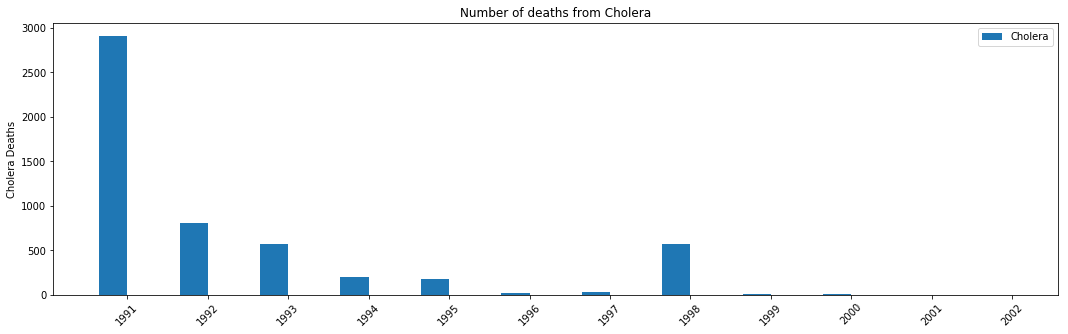

In [56]:
x = np.arange(len(peru_death_cholera["value"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, peru_death_cholera["value"], width, label='Cholera')
ax.set_ylabel('Cholera Deaths')
ax.set_title('Number of deaths from Cholera')
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(peru_death_cholera["year"])
ax.legend()

,code,description,year,country_code,sexo,value
id,,,,,,
1279,MDG_0000000001,Infant mortality rate (probability of dying be...,1990,PER,Both sexes,57.0
1280,MDG_0000000001,Infant mortality rate (probability of dying be...,1991,PER,Both sexes,54.3
1281,MDG_0000000001,Infant mortality rate (probability of dying be...,1992,PER,Both sexes,51.7
1282,MDG_0000000001,Infant mortality rate (probability of dying be...,1993,PER,Both sexes,48.9
1283,MDG_0000000001,Infant mortality rate (probability of dying be...,1994,PER,Both sexes,46.0


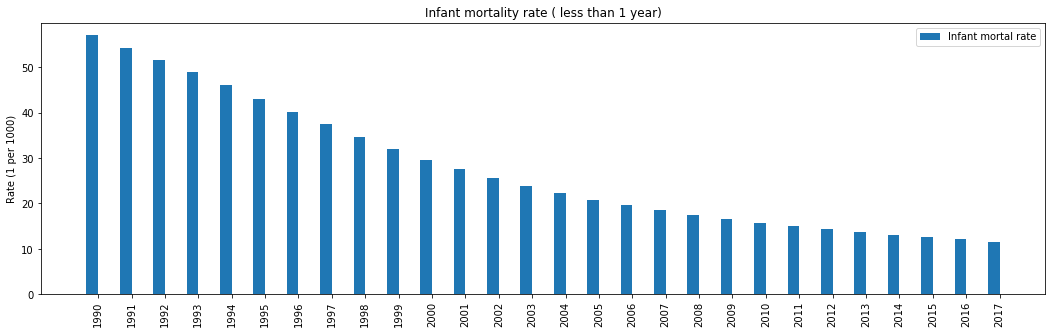

In [57]:
### Selecting dataframes per each item selected:
#Infant mortality rate (probability of dying between birth and age 1 per 1000 live births) and save as "peru_infant_death_rate"
peru_infant_death_rate=new_peru_health_df.loc[new_peru_health_df["description"]=="Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)",:]
peru_infant_death_rate= peru_infant_death_rate.astype({'year': int,'value':float})
x = np.arange(len(peru_infant_death_rate["value"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, peru_infant_death_rate["value"], width, label='Infant mortal rate')
ax.set_ylabel('Rate (1 per 1000)')
ax.set_title('Infant mortality rate ( less than 1 year)')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(peru_infant_death_rate["year"])
ax.legend()
peru_infant_death_rate.head()

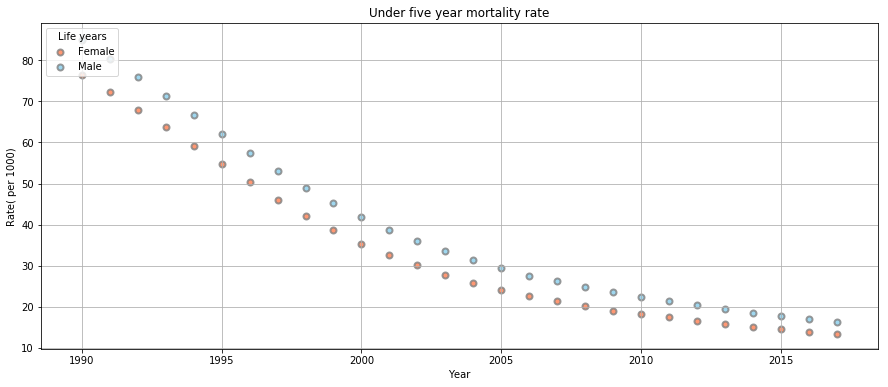

In [58]:
### Selecting dataframes per each item selected:
#Under-five mortality rate (probability of dying by age 5 per 1000 live births) and save as "peru_under5_mortality"
#peru_under5_mortality_female dataframe is for female
#peru_under5_mortality_male is for male
peru_under5_mortality=new_peru_health_df.loc[new_peru_health_df["description"]=="Under-five mortality rate (probability of dying by age 5 per 1000 live births)"]
peru_under5_mortality= peru_under5_mortality.astype({'year': int,'value':float})
peru_under5_mortality_female= peru_under5_mortality.loc[peru_under5_mortality["sexo"]=="Female"]
peru_under5_mortality_male= peru_under5_mortality.loc[peru_under5_mortality["sexo"]=="Male"]
peru_under5_mortality_both= peru_under5_mortality.loc[peru_under5_mortality["sexo"]=="Both sexes"]
plt.subplots(figsize=(15,6))
Female =  plt.scatter(peru_under5_mortality_female["year"], peru_under5_mortality_female["value"], c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Female')
Male = plt.scatter(peru_under5_mortality_male["year"], peru_under5_mortality_male["value"], c="skyblue",alpha=0.8, edgecolors="gray", linewidth=2, label='Male')
lgnd= plt.legend(handles=[Female,Male], scatterpoints=1 , prop={'size': 10}, loc="upper left", title="Life years")
plt.title("Under five year mortality rate")
plt.xlabel("Year")
plt.ylabel("Rate( per 1000)")
plt.grid()
plt.savefig("Under five mortality",bbox_inches="tight")
plt.show()

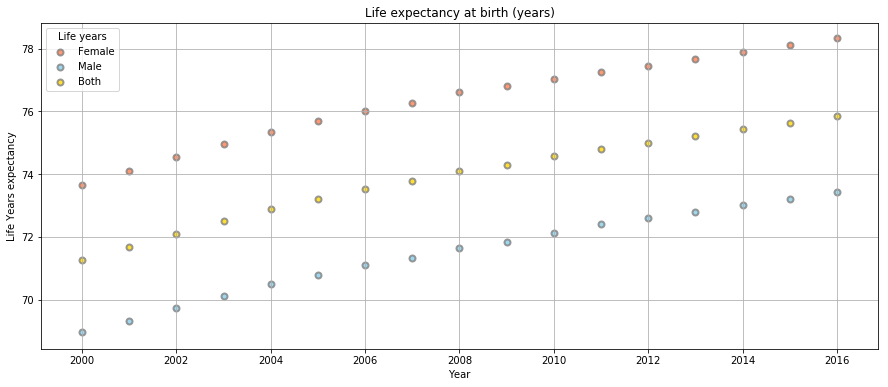

In [59]:
### Selecting dataframes per each item selected:
#Life expectancy at birth (years) and save as "peru_life_years"
#peru_life_years"_female dataframe is for female
#peru_life_years"_male is for male
peru_life_years=new_peru_health_df.loc[new_peru_health_df["description"]=="Life expectancy at birth (years)"]
peru_life_years= peru_life_years.astype({'year': int,'value':float})
peru_life_years_female= peru_life_years.loc[peru_life_years["sexo"]=="Female"]
peru_life_years_male= peru_life_years.loc[peru_life_years["sexo"]=="Male"]
peru_life_years_both= peru_life_years.loc[peru_life_years["sexo"]=="Both sexes"]
plt.subplots(figsize=(15,6))
Female =  plt.scatter(peru_life_years_female["year"], peru_life_years_female["value"], c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Female')
Male = plt.scatter(peru_life_years_male["year"], peru_life_years_male["value"], c="skyblue",alpha=0.8, edgecolors="gray", linewidth=2, label='Male')
Both = plt.scatter(peru_life_years_both["year"], peru_life_years_both["value"], c="gold",alpha=0.8, edgecolors="gray", linewidth=2, label='Both')
lgnd= plt.legend(handles=[Female,Male,Both], scatterpoints=1 , prop={'size': 10}, loc="upper left", title="Life years")
plt.title("Life expectancy at birth (years)")
plt.xlabel("Year")
plt.ylabel("Life Years expectancy")
plt.grid()
plt.savefig("Life_expectancy_years",bbox_inches="tight")
plt.show()

In [60]:
##SOURCE 1 PERU HEALTH DATAFRAMES:
#peru_death_cholera
#peru_infant_death_rate
#peru_under5_mortality_female
#peru_under5_mortality_male
#peru_under5_mortality_both
#peru_life_years_female
#peru_life_years_male
#peru_life_years_both

####### ----------EXTRACT -----------

In [61]:
####################### PERU ECONOMIC INDICATORS ############# 
#Extracting and cleaning process ( selecting only needed columns)
##### All indicators in csv, in 'Indicator Name' is showed the type of
peru_economic_df = pd.read_csv('https://query.data.world/s/bnrgb7cm7dpptarwdoqqceiacfur3h')
peru_economic_df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+num
1,Peru,PER,2017,"Population, total",SP.POP.TOTL,32165485
2,Peru,PER,2016,"Population, total",SP.POP.TOTL,31773839
3,Peru,PER,2015,"Population, total",SP.POP.TOTL,31376671
4,Peru,PER,2014,"Population, total",SP.POP.TOTL,30973354


In [62]:
peru_economic_df.count()

Country Name      1683
Country ISO3      1683
Year              1683
Indicator Name    1683
Indicator Code    1683
Value             1187
dtype: int64

####### ----------TRANSFORM -----------

In [64]:
new_peru_economic_df = peru_economic_df.copy()
new_peru_economic_df = new_peru_economic_df.iloc[1:]
new_peru_economic_df = new_peru_economic_df.dropna()
new_peru_economic_df = new_peru_economic_df.rename(columns={"Country Name": "country_name",
                                                         "Country ISO3": "country_code",
                                                         "Year": "year",
                                                         "Indicator Name": "description",
                                                         "Indicator Code": "code",
                                                           "Value": "value"})
new_peru_economic_df.index.names = ['id']
new_peru_economic_df.head()

,country_name,country_code,year,description,code,value
id,,,,,,
1,Peru,PER,2017,"Population, total",SP.POP.TOTL,32165485
2,Peru,PER,2016,"Population, total",SP.POP.TOTL,31773839
3,Peru,PER,2015,"Population, total",SP.POP.TOTL,31376671
4,Peru,PER,2014,"Population, total",SP.POP.TOTL,30973354
5,Peru,PER,2013,"Population, total",SP.POP.TOTL,30565716


In [65]:
new_peru_economic_df.count()

country_name    1186
country_code    1186
year            1186
description     1186
code            1186
value           1186
dtype: int64

In [66]:
print(new_peru_economic_df.dtypes)

country_name    object
country_code    object
year            object
description     object
code            object
value           object
dtype: object


,country_name,country_code,year,description,code,value
id,,,,,,
58,Peru,PER,1960,"Population, total",SP.POP.TOTL,10.061515
57,Peru,PER,1961,"Population, total",SP.POP.TOTL,10.350242
56,Peru,PER,1962,"Population, total",SP.POP.TOTL,10.650667
55,Peru,PER,1963,"Population, total",SP.POP.TOTL,10.961540
54,Peru,PER,1964,"Population, total",SP.POP.TOTL,11.281015


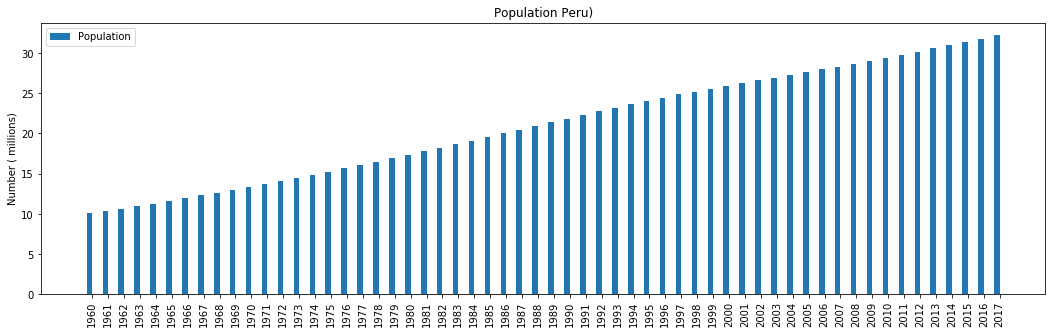

In [67]:
### Selecting dataframes per each item selected:
#Peru Poblation  and save as "peru_populatio"
peru_population=new_peru_economic_df.loc[new_peru_economic_df["description"]=="Population, total",:]
peru_population= peru_population.astype({'year': int,'value':float})
peru_population = peru_population.sort_values(by=['year'])
peru_population['value']=peru_population['value'].div(1000000)
x = np.arange(len(peru_population["value"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, peru_population["value"], width, label='Population')
ax.set_ylabel('Number ( millions)')
ax.set_title('Population Peru)')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(peru_population["year"])
ax.legend()
peru_population.head()

,country_name,country_code,year,description,code,value
id,,,,,,
406,Peru,PER,1960,Population growth (annual %),SP.POP.GROW,2.787635
405,Peru,PER,1961,Population growth (annual %),SP.POP.GROW,2.829215
404,Peru,PER,1962,Population growth (annual %),SP.POP.GROW,2.861262
403,Peru,PER,1963,Population growth (annual %),SP.POP.GROW,2.877026
402,Peru,PER,1964,Population growth (annual %),SP.POP.GROW,2.872844


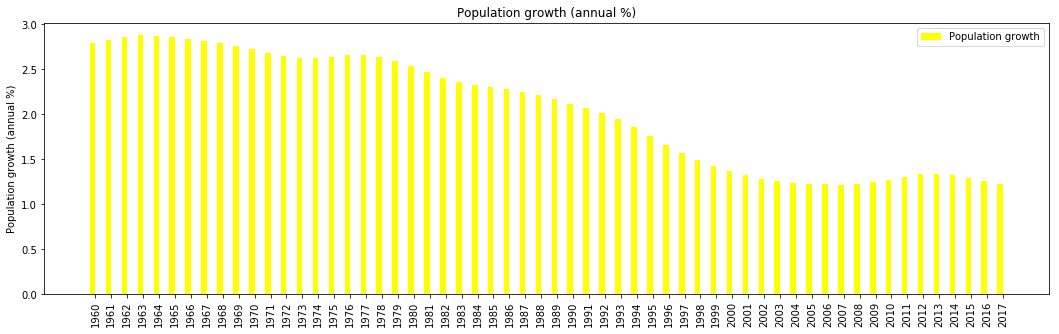

In [68]:
### Selecting dataframes per each item selected:
#Population growth (annual %)  and save as "peru_growth"
peru_growth_pob=new_peru_economic_df.loc[new_peru_economic_df["description"]=="Population growth (annual %)",:]
peru_growth_pob= peru_growth_pob.astype({'year': int,'value':float})
peru_growth_pob = peru_growth_pob.sort_values(by=['year'])
x = np.arange(len(peru_growth_pob["value"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, peru_growth_pob["value"], width, color='yellow', label='Population growth')
ax.set_ylabel('Population growth (annual %)')
ax.set_title('Population growth (annual %)')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(peru_population["year"])
ax.legend()
peru_growth_pob.head()

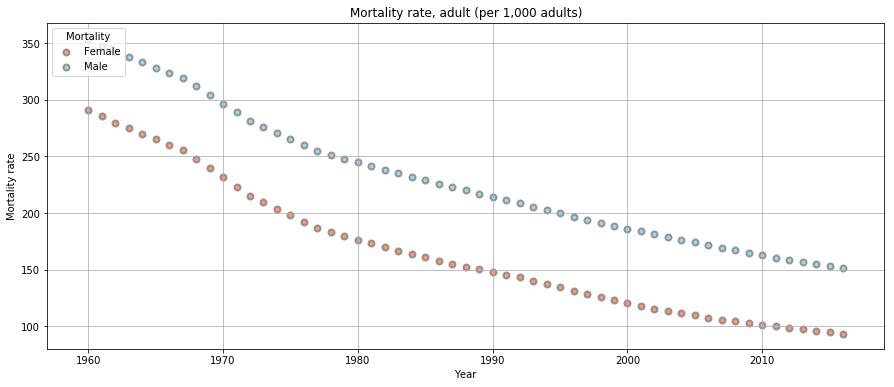

In [71]:
### Selecting dataframes per each item selected:
#Mortality rate, adult (per 1,000 adults)
peru_mort_female=new_peru_economic_df.loc[new_peru_economic_df["description"]=="Mortality rate, adult, female (per 1,000 female adults)",:]
peru_mort_female= peru_mort_female.astype({'year': int,'value':float})
peru_mort_female = peru_mort_female.sort_values(by=['year'])
peru_mort_male = new_peru_economic_df.loc[new_peru_economic_df["description"]=="Mortality rate, adult, male (per 1,000 male adults)",:]
peru_mort_male= peru_mort_male.astype({'year': int,'value':float})
peru_mort_male = peru_mort_male.sort_values(by=['year'])
plt.subplots(figsize=(15,6))
Female =  plt.scatter(peru_mort_female["year"], peru_mort_female["value"], c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Female')
Male = plt.scatter(peru_mort_male["year"], peru_mort_male["value"], c="skyblue",alpha=0.8, edgecolors="gray", linewidth=2, label='Male')
lgnd= plt.legend(handles=[Female,Male], scatterpoints=1 , prop={'size': 10}, loc="upper left", title="Mortality")
plt.title("Mortality rate, adult (per 1,000 adults)")
plt.xlabel("Year")
plt.ylabel("Mortality rate")
plt.grid()
plt.show()

,country_name,country_code,year,description,code,value
id,,,,,,
580,Peru,PER,1960,GNI (current US$),NY.GNP.MKTP.CD,2.433616
579,Peru,PER,1961,GNI (current US$),NY.GNP.MKTP.CD,2.754451
578,Peru,PER,1962,GNI (current US$),NY.GNP.MKTP.CD,3.148120
577,Peru,PER,1963,GNI (current US$),NY.GNP.MKTP.CD,3.457707
576,Peru,PER,1964,GNI (current US$),NY.GNP.MKTP.CD,4.177829


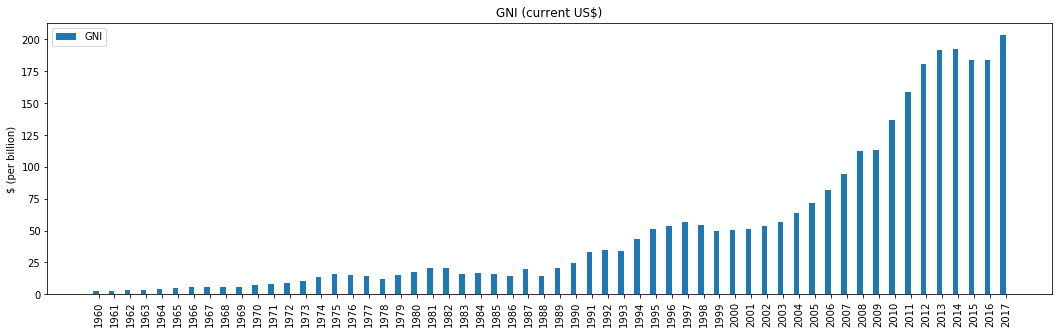

In [72]:
### Selecting dataframes per each item selected:
#GNI per capita, PPP (current international $)  and save as "peru_gni"
peru_gni=new_peru_economic_df.loc[new_peru_economic_df["description"]=="GNI (current US$)",:]
peru_gni= peru_gni.astype({'year': int,'value':float})
peru_gni = peru_gni.sort_values(by=['year'])
peru_gni['value']=peru_gni['value'].div(1000000000)
x = np.arange(len(peru_gni["value"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, peru_gni["value"], width, label='GNI')
ax.set_ylabel('$ (per billion)')
ax.set_title('GNI (current US$)')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(peru_gni["year"])
ax.legend()
peru_gni.head()

,country_name,country_code,year,description,code,value
id,,,,,,
1392,Peru,PER,1960,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,8.664459
1391,Peru,PER,1961,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,5.916709
1390,Peru,PER,1962,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,6.641093
1389,Peru,PER,1963,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,6.070144
1388,Peru,PER,1964,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,9.792285


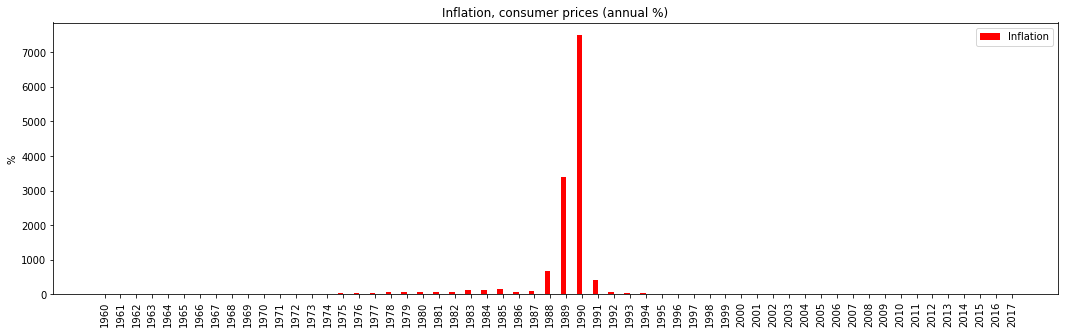

In [73]:
### Selecting dataframes per each item selected:
#Inflation, consumer prices (annual %)  and save as "peru_inflation"
peru_inflation=new_peru_economic_df.loc[new_peru_economic_df["description"]=="Inflation, consumer prices (annual %)",:]
peru_inflation= peru_inflation.astype({'year': int,'value':float})
peru_inflation = peru_inflation.sort_values(by=['year'])
x = np.arange(len(peru_inflation["value"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, peru_inflation["value"], width, color='r', label='Inflation')
ax.set_ylabel('%')
ax.set_title('Inflation, consumer prices (annual %)')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(peru_inflation["year"])
ax.legend()
peru_inflation.head()

,country_name,country_code,year,description,code,value
id,,,,,,
1682,Peru,PER,1960,Urban population (% of total),SP.URB.TOTL.IN.ZS,46.811
1681,Peru,PER,1961,Urban population (% of total),SP.URB.TOTL.IN.ZS,47.398
1680,Peru,PER,1962,Urban population (% of total),SP.URB.TOTL.IN.ZS,48.514
1679,Peru,PER,1963,Urban population (% of total),SP.URB.TOTL.IN.ZS,49.632
1678,Peru,PER,1964,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.752


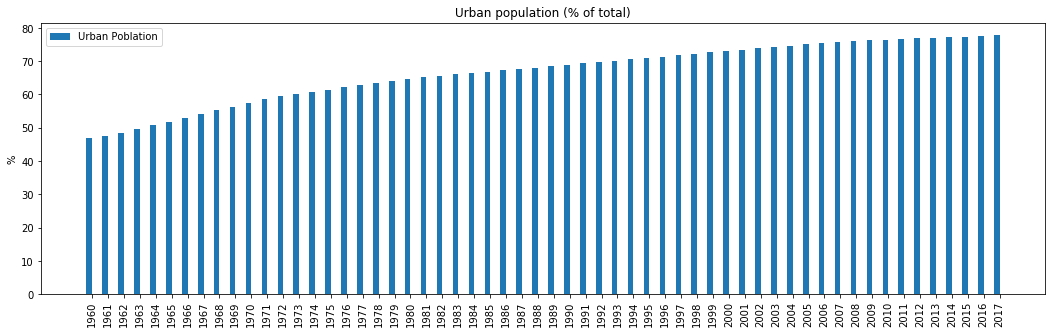

In [74]:
### Selecting dataframes per each item selected:
#Urban population (% of total)  and save as "peru_urban_pop"
peru_urban_pop=new_peru_economic_df.loc[new_peru_economic_df["description"]=="Urban population (% of total)",:]
peru_urban_pop= peru_urban_pop.astype({'year': int,'value':float})
peru_urban_pop = peru_urban_pop.sort_values(by=['year'])
x = np.arange(len(peru_urban_pop["value"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, peru_urban_pop["value"], width, label='Urban Poblation')
ax.set_ylabel('%')
ax.set_title('Urban population (% of total)')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(peru_urban_pop["year"])
ax.legend()
peru_urban_pop.head()

In [75]:
##SOURCE 2 PERU ECONOMICS:
#peru_population
#peru_growth_pob
#peru_mort_male
#peru_mort_female 
#peru_gni
#peru_inflation
#peru_urban_pop

############################# ---------------LOAD -----------------------------#######################

In [80]:
connection_string = "postgres:password@localhost:5432/Peru_db"
engine = create_engine(f'postgresql://{connection_string}')

In [81]:
# Confirm tables
engine.table_names()

['peru_under5_mortality_female',
 'peru_death_cholera',
 'peru_infant_death_rate',
 'peru_under5_mortality_male',
 'peru_under5_mortality_both',
 'peru_life_years_female',
 'peru_life_years_male',
 'peru_life_years_both',
 'peru_population',
 'peru_growth_pob',
 'peru_mort_female',
 'peru_mort_male',
 'peru_gni',
 'peru_inflation',
 'peru_urban_pop']

In [82]:
peru_death_cholera.to_sql(name='peru_death_cholera', con=engine, if_exists='append', index=True)
peru_infant_death_rate.to_sql(name='peru_infant_death_rate', con=engine, if_exists='append', index=True)
peru_under5_mortality_female.to_sql(name='peru_under5_mortality_female', con=engine, if_exists='append', index=True)
peru_under5_mortality_male.to_sql(name='peru_under5_mortality_male', con=engine, if_exists='append', index=True)
peru_under5_mortality_both.to_sql(name='peru_under5_mortality_both', con=engine, if_exists='append', index=True)
peru_life_years_female.to_sql(name='peru_life_years_female', con=engine, if_exists='append', index=True)
peru_life_years_male.to_sql(name='peru_life_years_male', con=engine, if_exists='append', index=True)
peru_life_years_both.to_sql(name='peru_life_years_both', con=engine, if_exists='append', index=True)
peru_population.to_sql(name='peru_population', con=engine, if_exists='append', index=True)
peru_growth_pob.to_sql(name='peru_growth_pob', con=engine, if_exists='append', index=True)
peru_mort_female.to_sql(name='peru_mort_female', con=engine, if_exists='append', index=True)
peru_mort_male.to_sql(name='peru_mort_male', con=engine, if_exists='append', index=True)
peru_gni.to_sql(name='peru_gni', con=engine, if_exists='append', index=True)
peru_inflation.to_sql(name='peru_inflation', con=engine, if_exists='append', index=True)
peru_urban_pop.to_sql(name='peru_urban_pop', con=engine, if_exists='append', index=True)

In [83]:
##############  --- Confirm data has been added by querying the customer_name table
pd.read_sql_query('select * from peru_death_cholera', con=engine).head()

,id,code,description,year,country_code,value
0,1134,CHOLERA_0000000002,Number of reported deaths from cholera,1991,PER,2909.0
1,1135,CHOLERA_0000000002,Number of reported deaths from cholera,1992,PER,801.0
2,1136,CHOLERA_0000000002,Number of reported deaths from cholera,1993,PER,575.0
3,1137,CHOLERA_0000000002,Number of reported deaths from cholera,1994,PER,199.0
4,1138,CHOLERA_0000000002,Number of reported deaths from cholera,1995,PER,171.0


In [84]:
pd.read_sql_query('select * from peru_infant_death_rate', con=engine).head()

,id,sexo,code,description,year,country_code,value
0,1279,Both sexes,MDG_0000000001,Infant mortality rate (probability of dying be...,1990,PER,57.0
1,1280,Both sexes,MDG_0000000001,Infant mortality rate (probability of dying be...,1991,PER,54.3
2,1281,Both sexes,MDG_0000000001,Infant mortality rate (probability of dying be...,1992,PER,51.7
3,1282,Both sexes,MDG_0000000001,Infant mortality rate (probability of dying be...,1993,PER,48.9
4,1283,Both sexes,MDG_0000000001,Infant mortality rate (probability of dying be...,1994,PER,46.0


In [85]:
pd.read_sql_query('select * from peru_under5_mortality_female', con=engine).head()

,id,sexo,code,description,year,country_code,value
0,1317,Female,MDG_0000000007,Under-five mortality rate (probability of dyin...,1990,PER,76.4
1,1320,Female,MDG_0000000007,Under-five mortality rate (probability of dyin...,1991,PER,72.2
2,1323,Female,MDG_0000000007,Under-five mortality rate (probability of dyin...,1992,PER,68.0
3,1326,Female,MDG_0000000007,Under-five mortality rate (probability of dyin...,1993,PER,63.7
4,1329,Female,MDG_0000000007,Under-five mortality rate (probability of dyin...,1994,PER,59.2


In [86]:
pd.read_sql_query('select * from peru_under5_mortality_male', con=engine).head()

,id,sexo,code,description,year,country_code,value
0,1318,Male,MDG_0000000007,Under-five mortality rate (probability of dyin...,1990,PER,84.9
1,1321,Male,MDG_0000000007,Under-five mortality rate (probability of dyin...,1991,PER,80.4
2,1324,Male,MDG_0000000007,Under-five mortality rate (probability of dyin...,1992,PER,75.9
3,1327,Male,MDG_0000000007,Under-five mortality rate (probability of dyin...,1993,PER,71.2
4,1330,Male,MDG_0000000007,Under-five mortality rate (probability of dyin...,1994,PER,66.6


In [87]:
pd.read_sql_query('select * from peru_under5_mortality_both', con=engine).head()

,id,sexo,code,description,year,country_code,value
0,1316,Both sexes,MDG_0000000007,Under-five mortality rate (probability of dyin...,1990,PER,80.7
1,1319,Both sexes,MDG_0000000007,Under-five mortality rate (probability of dyin...,1991,PER,76.4
2,1322,Both sexes,MDG_0000000007,Under-five mortality rate (probability of dyin...,1992,PER,72.0
3,1325,Both sexes,MDG_0000000007,Under-five mortality rate (probability of dyin...,1993,PER,67.5
4,1328,Both sexes,MDG_0000000007,Under-five mortality rate (probability of dyin...,1994,PER,63.0


In [88]:
pd.read_sql_query('select * from peru_life_years_female', con=engine).head()

,id,sexo,code,description,year,country_code,value
0,2655,Female,WHOSIS_000001,Life expectancy at birth (years),2000,PER,73.65123
1,2658,Female,WHOSIS_000001,Life expectancy at birth (years),2001,PER,74.11005
2,2661,Female,WHOSIS_000001,Life expectancy at birth (years),2002,PER,74.55469
3,2664,Female,WHOSIS_000001,Life expectancy at birth (years),2003,PER,74.95766
4,2667,Female,WHOSIS_000001,Life expectancy at birth (years),2004,PER,75.34932


In [89]:
pd.read_sql_query('select * from peru_life_years_male', con=engine).head()

,id,sexo,code,description,year,country_code,value
0,2656,Male,WHOSIS_000001,Life expectancy at birth (years),2000,PER,68.95637
1,2659,Male,WHOSIS_000001,Life expectancy at birth (years),2001,PER,69.33513
2,2662,Male,WHOSIS_000001,Life expectancy at birth (years),2002,PER,69.73786
3,2665,Male,WHOSIS_000001,Life expectancy at birth (years),2003,PER,70.11917
4,2668,Male,WHOSIS_000001,Life expectancy at birth (years),2004,PER,70.49104


In [90]:
pd.read_sql_query('select * from peru_life_years_both', con=engine).head()

,id,sexo,code,description,year,country_code,value
0,2654,Both sexes,WHOSIS_000001,Life expectancy at birth (years),2000,PER,71.25698
1,2657,Both sexes,WHOSIS_000001,Life expectancy at birth (years),2001,PER,71.67751
2,2660,Both sexes,WHOSIS_000001,Life expectancy at birth (years),2002,PER,72.10473
3,2663,Both sexes,WHOSIS_000001,Life expectancy at birth (years),2003,PER,72.50131
4,2666,Both sexes,WHOSIS_000001,Life expectancy at birth (years),2004,PER,72.88780


In [91]:
pd.read_sql_query('select * from peru_population', con=engine).head()

,id,country_name,country_code,description,year,code,value
0,58,Peru,PER,"Population, total",1960,SP.POP.TOTL,10.061515
1,57,Peru,PER,"Population, total",1961,SP.POP.TOTL,10.350242
2,56,Peru,PER,"Population, total",1962,SP.POP.TOTL,10.650667
3,55,Peru,PER,"Population, total",1963,SP.POP.TOTL,10.961540
4,54,Peru,PER,"Population, total",1964,SP.POP.TOTL,11.281015


In [92]:
pd.read_sql_query('select * from peru_growth_pob', con=engine).head()

,id,country_name,country_code,description,year,code,value
0,406,Peru,PER,Population growth (annual %),1960,SP.POP.GROW,2.787635
1,405,Peru,PER,Population growth (annual %),1961,SP.POP.GROW,2.829215
2,404,Peru,PER,Population growth (annual %),1962,SP.POP.GROW,2.861262
3,403,Peru,PER,Population growth (annual %),1963,SP.POP.GROW,2.877026
4,402,Peru,PER,Population growth (annual %),1964,SP.POP.GROW,2.872844


In [93]:
pd.read_sql_query('select * from peru_mort_female', con=engine).head()

,id,country_name,country_code,description,year,code,value
0,696,Peru,PER,"Mortality rate, adult, female (per 1,000 femal...",1960,SP.DYN.AMRT.FE,291.233
1,695,Peru,PER,"Mortality rate, adult, female (per 1,000 femal...",1961,SP.DYN.AMRT.FE,285.333
2,694,Peru,PER,"Mortality rate, adult, female (per 1,000 femal...",1962,SP.DYN.AMRT.FE,279.433
3,693,Peru,PER,"Mortality rate, adult, female (per 1,000 femal...",1963,SP.DYN.AMRT.FE,274.610
4,692,Peru,PER,"Mortality rate, adult, female (per 1,000 femal...",1964,SP.DYN.AMRT.FE,269.786


In [94]:
pd.read_sql_query('select * from peru_mort_male', con=engine).head()

,id,country_name,country_code,description,year,code,value
0,754,Peru,PER,"Mortality rate, adult, male (per 1,000 male ad...",1960,SP.DYN.AMRT.MA,352.838
1,753,Peru,PER,"Mortality rate, adult, male (per 1,000 male ad...",1961,SP.DYN.AMRT.MA,347.367
2,752,Peru,PER,"Mortality rate, adult, male (per 1,000 male ad...",1962,SP.DYN.AMRT.MA,341.897
3,751,Peru,PER,"Mortality rate, adult, male (per 1,000 male ad...",1963,SP.DYN.AMRT.MA,337.371
4,750,Peru,PER,"Mortality rate, adult, male (per 1,000 male ad...",1964,SP.DYN.AMRT.MA,332.846


In [95]:
pd.read_sql_query('select * from peru_gni', con=engine).head()

,id,country_name,country_code,description,year,code,value
0,580,Peru,PER,GNI (current US$),1960,NY.GNP.MKTP.CD,2.433616
1,579,Peru,PER,GNI (current US$),1961,NY.GNP.MKTP.CD,2.754451
2,578,Peru,PER,GNI (current US$),1962,NY.GNP.MKTP.CD,3.148120
3,577,Peru,PER,GNI (current US$),1963,NY.GNP.MKTP.CD,3.457707
4,576,Peru,PER,GNI (current US$),1964,NY.GNP.MKTP.CD,4.177829


In [96]:
pd.read_sql_query('select * from peru_inflation', con=engine).head()

,id,country_name,country_code,description,year,code,value
0,1392,Peru,PER,"Inflation, consumer prices (annual %)",1960,FP.CPI.TOTL.ZG,8.664459
1,1391,Peru,PER,"Inflation, consumer prices (annual %)",1961,FP.CPI.TOTL.ZG,5.916709
2,1390,Peru,PER,"Inflation, consumer prices (annual %)",1962,FP.CPI.TOTL.ZG,6.641093
3,1389,Peru,PER,"Inflation, consumer prices (annual %)",1963,FP.CPI.TOTL.ZG,6.070144
4,1388,Peru,PER,"Inflation, consumer prices (annual %)",1964,FP.CPI.TOTL.ZG,9.792285


In [97]:
pd.read_sql_query('select * from peru_urban_pop', con=engine).head()

,id,country_name,country_code,description,year,code,value
0,1682,Peru,PER,Urban population (% of total),1960,SP.URB.TOTL.IN.ZS,46.811
1,1681,Peru,PER,Urban population (% of total),1961,SP.URB.TOTL.IN.ZS,47.398
2,1680,Peru,PER,Urban population (% of total),1962,SP.URB.TOTL.IN.ZS,48.514
3,1679,Peru,PER,Urban population (% of total),1963,SP.URB.TOTL.IN.ZS,49.632
4,1678,Peru,PER,Urban population (% of total),1964,SP.URB.TOTL.IN.ZS,50.752


In [100]:
df_query_join=pd.read_sql_query('SELECT peru_infant_death_rate.year, peru_infant_death_rate.value as Infant_death_rate, peru_gni.value as GNI \
                    FROM peru_infant_death_rate \
                    INNER JOIN peru_gni \
                    ON peru_infant_death_rate.Year = peru_gni.Year;', con=engine)
df_query_join.head()

,year,infant_death_rate,gni
0,1990,57.0,24.799606
1,1991,54.3,33.468063
2,1992,51.7,34.897209
3,1993,48.9,33.653696
4,1994,46.0,43.150876


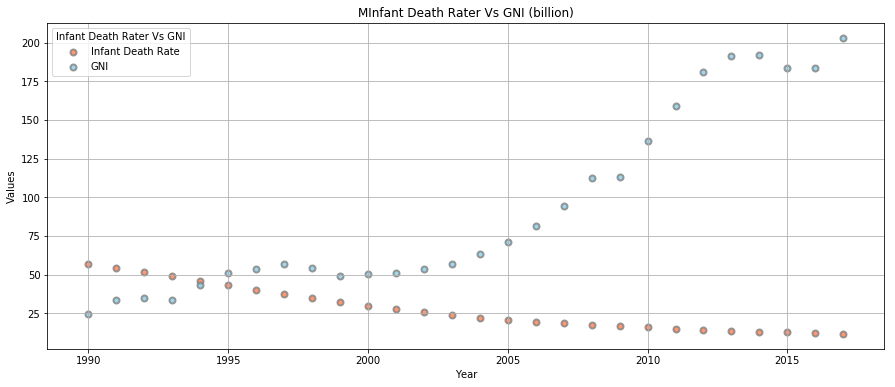

In [101]:
plt.subplots(figsize=(15,6))
infant =  plt.scatter(df_query_join["year"], df_query_join["infant_death_rate"], c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Infant Death Rate')
GNI = plt.scatter(df_query_join["year"], df_query_join["gni"], c="skyblue",alpha=0.8, edgecolors="gray", linewidth=2, label='GNI')
lgnd= plt.legend(handles=[infant,GNI], scatterpoints=1 , prop={'size': 10}, loc="upper left", title="Infant Death Rater Vs GNI")
plt.title("MInfant Death Rater Vs GNI (billion)")
plt.xlabel("Year")
plt.ylabel("Values")
plt.grid()
plt.show()